[0.00000e+00 1.00000e-03 2.00000e-03 ... 2.00997e+02 2.00998e+02
 2.00999e+02]
[np.float64(0.004102757723347339), np.float64(0.004102671947441603), np.float64(0.0041025861725706055), np.float64(0.00410250039873494), np.float64(0.004102414625935201), np.float64(0.004102328854171979), np.float64(0.00410224308344587), np.float64(0.004102157313757468), np.float64(0.0041020715451073695), np.float64(0.004101985777496165), np.float64(0.0041019000109244535), np.float64(0.004101814245392829), np.float64(0.004101728480901887), np.float64(0.004101642717452224), np.float64(0.004101556955044438), np.float64(0.004101471193679124), np.float64(0.004101385433356879), np.float64(0.004101299674078302), np.float64(0.00410121391584399), np.float64(0.004101128158654542), np.float64(0.0041010424025105545), np.float64(0.004100956647412628), np.float64(0.004100870893361361), np.float64(0.0041007851403573525), np.float64(0.004100699388401203), np.float64(0.004100613637493513), np.float64(0.004100527887634881), 

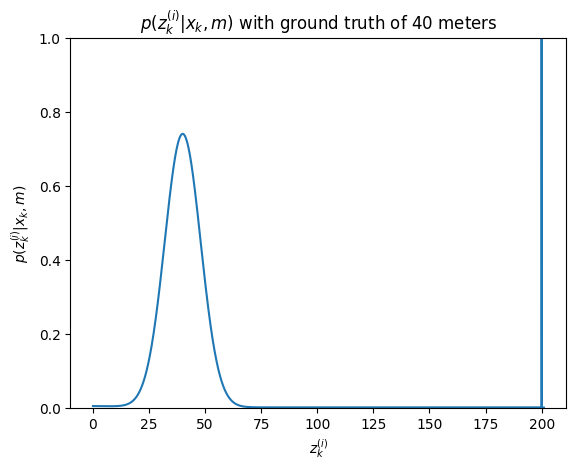

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Adjust these parameters
alpha_hit = 0.74
alpha_short = 0.07
alpha_max = 0.07
alpha_rand = 0.12
sigma_hit = 8.0
eps = 0.01
ground_truth = 40

# Your sensor table will be a `table_width` x `table_width` np array:
table_width = 201

def p_hit( z, d, inverse_eta = 1):
        """
        Implements the p_hit function from the handout.
        args:
            z: a number/vector reperesenting measured distances
            d: a number representing ground truth distance
            inverse_eta: 1/normailization constant
        returns:
            probability: the hit probability of measuring z given d
        """
        if 0 <= z <= table_width - 1:
            numerator = np.exp((-(z - d)**2) / (2 * sigma_hit**2))
            return numerator / inverse_eta
        return 0.0

def p_short( z, d):
    if 0 <= z <= d and d != 0:
        return (2 / d) * (1 - z/d)
    return 0.0

def p_max( z, d):
    if (table_width - 1 - eps <= z) and (table_width - 1 >= z):
        return 1/eps
    return 0.0

def p_rand( z, d):
    if 0 <= z <= table_width - 1:
        return 1/(table_width - 1)
    return 0.0

def get_prob(z):
    prob = 0
    prob += alpha_hit * p_hit(z, ground_truth, inverse_eta=1)
    prob += alpha_short * p_short(z, ground_truth)
    prob += alpha_max * p_max(z, ground_truth)
    prob += alpha_rand * p_rand(z, ground_truth)
    return prob

zvals = np.arange(0,table_width,1/1000)
probs = []
for z in zvals:
    probs.append(get_prob(z))
# print(table_width)
print(zvals)
print(probs)

# plt.plot(zvals, np.log(probs))
plt.plot(zvals, probs)
plt.ylim(0,1)
plt.xlabel("$z_{k}^{(i)}$")
plt.ylabel("$ p(z_{k}^{(i)}| x_{k}, m)$")
title = '$ p(z_{k}^{(i)}| x_{k}, m)$ with ground truth of '+ f'{ground_truth} meters'
plt.title(title)
plt.show()